# PH 333 Chapter 3 Test
## Problem 1
Numerically determine the voltage inside of a square centered at the origin and
with sides equal to 40. The boundaries of the square are kept at a potential
equal to $x^2$ or $y=0$ depending on the side. Additionally there is a square in 
the center kept at 100V.

In [12]:
from numpy import zeros,max,copy,empty
from matplotlib.pyplot import imshow,gray,show, figure, colorbar

#Here I will use a grid size 3 times larger than the 40 
#we were given in order to improve the resolution
M = 120         # Grid squares on a side.
target = 4e-5   # Target accuracy
omega = .94     #Technique learned from PH295 to speed up calculations

#function to calculate voltage boundary conditions of the x wires
def Voltagex(x): 
    Vx = ((x-60)/3)**2
    return Vx

#function to calculate voltage boundary conditions along the y axis
def Voltagey(y): 
    Vy = 0
    return Vy

# Create array for graphing
Voltage = zeros([M+1,M+1],float)
X = Voltage
Y = Voltage

#input the boundary conditions at the x,y boundaries
for i in range(0,M):
    Voltage[0,i] = Voltagex(i)
    Voltage[-1,i] = Voltagex(i)

    Voltage[i,0] = Voltagey(i)
    Voltage[i,-1] = Voltagey(i)

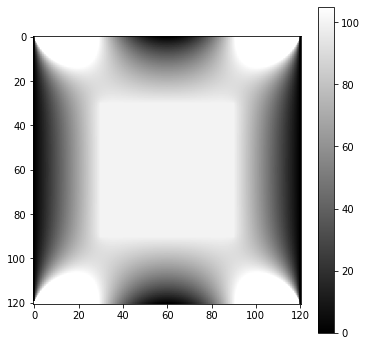

In [17]:
# Main loop Used for relaxation 
delta = 1.0 #Dummy variable used for calculating error
while delta>target:
    
    # Calculate new values of the potential
    phiprime = copy(Voltage) #Phi prime is used to compare 
                             #the new voltage to the old voltage, which we will use to 
                             #find our error rate.

    #this is to run through the x and y coordinates
    for i in range(M+1):
        for j in range(M+1):
            if not(i==0 or i==M or j==0 or j==M): 
                #This ensures we do not rewrite our boundary conditions
                
                Voltage[i,j] = (1+ omega)*(Voltage[i+1,j] + Voltage[i-1,j]\
                + Voltage[i,j+1] + Voltage[i,j-1])/4 - omega*Voltage[i,j]
            
            #Ensure that the square in the middle stays at 100V
            if (i<=90 and i>=30 and j<=90 and j>=30):
                Voltage[i,j] = 100

    # Calculate maximum difference from old values to ensure all values are within target accuracy
    delta = max(abs(Voltage-phiprime))

# Make a plot
f=figure()
f.set_figwidth(6)
f.set_figheight(6)
imshow(Voltage, vmax=105)
colorbar()
gray()
show()